In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [6]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.1
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

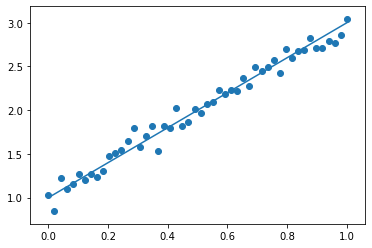

In [7]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [8]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.LogLike(y, cov_likelihood)

In [9]:
class MyLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x
        qoi = None
        return output, qoi

In [10]:
my_link_factory = MyLinkFactory(my_prior, my_loglike)

In [11]:
rwmh_cov = np.eye(2)
rmwh_scaling = 0.1
rwmh_adaptive = True
my_proposal = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

#pcn_scaling = 0.1
#pcn_adaptive = True
#my_proposal = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_proposal = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

In [12]:
my_chain = tda.Chain(my_link_factory, my_proposal)

In [13]:
my_chain.sample(12000)

Running chain, α = 1.00:   0%|          | 0/12000 [00:00<?, ?it/s]/home/mikkel/.local/lib/python3.8/site-packages/tinyDA/proposal.py:225: RuntimeWarning: overflow encountered in exp
  # get the acceptance probability.
Running chain, α = 0.25: 100%|██████████| 12000/12000 [00:24<00:00, 496.31it/s]


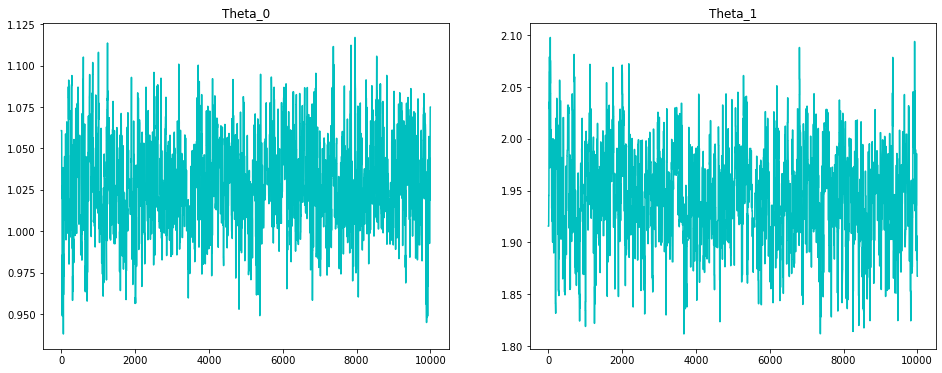

In [16]:
burnin = 2000
parameters = tda.get_parameters(my_chain)
tda.plot_parameters(parameters, burnin=burnin)